In [2]:
!pip install spotipy

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [41]:
import pandas as pd
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
client_id=    'e6778487ca914c3991f78eb0432e3709'
client_secret=''

In [18]:
client_credentials_manager = SpotifyClientCredentials(client_id,client_secret)

In [19]:
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [20]:
sp

In [21]:
def getTrackIDs(user,playlist_id):
    ids = []
    playlist = sp.user_playlist(user,playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = getTrackIDs('ngj93u4m4sjssmol1jxiwoz52','37i9dQZF1EMdRmPfmX83b8')

In [22]:
print(len(ids))

100


In [36]:
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)
    
    #meta
    #曲名
    name = meta['name']
    #アルバム名
    album = meta['album']['name']
    #アーティスト名
    artist = meta['album']['artists'][0]['name']
    #リリース日
    release_date = meta['album']['release_date']
    #曲の長さ(millseconds)
    length = meta['duration_ms']
    #人気度
    popularity = meta['popularity']
    
    #features
    #アコースティック度(0.0-1.0 1.0がアコースティック度高いことを示す)
    acousticness = features[0]['acousticness']
    #ダンス度（テンポ、リズムの一定感、ビートの強さなどから算出）
    danceability = features[0]['danceability']
    #エネルギー　fast,loud,noisyであれば1に近づく
    energy = features[0]['energy']
    #インスト感　0.0 - 1.0 0.5以上でインスト
    instrumentalness = features[0]['instrumentalness']
    #曲調を示す。メジャーが1、マイナーが0
    mode = features[0]['mode']
    #ライブさ 0.8以上でライブトラックの可能性大
    liveness = features[0]['liveness']
    #音の大きさ
    loudness = features[0]['loudness']
    #スピーチ度（トークショー、オーディオブック、ポエムなどは1に近くなる）
    speechiness = features[0]['speechiness']
    #曲のテンポ（BPMが数字が入る）
    tempo = features[0]['tempo']
    #拍子
    time_signature = features[0]['time_signature']
    #曲のポジティブ度（1がポジティブ、0がネガティブ）
    valence = features[0]['valence']
    
    track = [name,album,artist,release_date,length,mode,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence]
    return track

In [37]:
tracks = []
for i in range(len(ids)):
    time.sleep(.5)
    track = getTrackFeatures(ids[i])
    tracks.append(track)
   
# create dataset
df = pd.DataFrame(tracks,columns=['name','album','artist','release_date','length','mode','popularity','danceability','acousticness','energy','instrumentalness','liveness','loudness','speechiness','tempo','time_signature','valence'])

In [38]:
df.head()

,name,album,artist,release_date,length,mode,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,You,You,Axol,2016-11-06,198750,1,53,0.702,0.01350,0.911,0.020400,0.1730,-3.301,0.0375,128.005,4,0.431
1,Make you happy,Make you happy,NiziU,2020-06-30,184520,1,74,0.780,0.04360,0.885,0.000028,0.1050,-3.745,0.1220,160.087,4,0.808
2,グランマのレシピ,グランマのレシピ,Mai,2020-08-15,223064,1,22,0.801,0.12800,0.704,0.000000,0.0952,-9.034,0.0318,124.049,4,0.962
3,クリームソーダ,クリームソーダ,INNER JOURNEY,2020-03-18,210139,1,34,0.665,0.00149,0.668,0.000000,0.6150,-10.100,0.0275,107.547,4,0.902
4,広い世界の端っこ,広い世界の端っこ,Mai,2020-08-16,266341,1,14,0.770,0.21600,0.453,0.000017,0.0889,-11.125,0.0307,122.999,4,0.536


In [40]:
#csvファイルに保存する
df.to_csv("spotify_utada_songdate.csv",index=False)

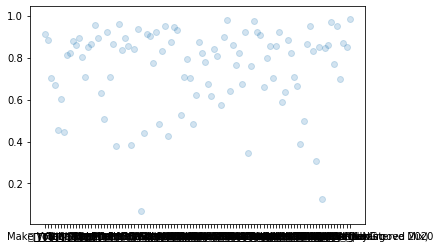

In [45]:
plt.scatter(df['name'],df['energy'],alpha=0.2)

In [46]:
df['energy'].mean()

0.7518080000000001

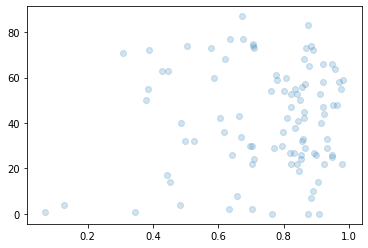

In [49]:
plt.scatter(df['energy'],df['popularity'],alpha=0.2)
plt.savefig('energy-popularity.png')